In [1]:
from ase.io import read, write, Trajectory
import numpy as np

In [2]:
def CoM(clus):
    """
    Support function to set the origin of the cluster at the centre of the mass
    """
    (cx, cy, cz) = clus.get_center_of_mass()
    new_xyz = []
    for i, a in enumerate(clus):
        x, y, z = a.position
        x -= cx
        y -= cy
        z -= cz
        new_xyz.append((x, y, z))
    clus.set_positions(new_xyz)
    return clus

In [3]:
def checkSimilar(clus1, clus2):

    """Check whether two clusters are similar or not by comparing their moments of inertia"""
    Inertia1 = clus1.get_moments_of_inertia()
    Inertia2 = clus2.get_moments_of_inertia()
    # print(Inertia1, Inertia2, 'diff: ', Inertia1-Inertia2)

    tol = 0.01
    if (
        Inertia1[0] * (1 - tol) <= Inertia2[0] <= Inertia1[0] * (1 + tol)
        and Inertia1[1] * (1 - tol) <= Inertia2[1] <= Inertia1[1] * (1 + tol)
        and Inertia1[2] * (1 - tol) <= Inertia2[2] <= Inertia1[2] * (1 + tol)
    ):
        similar = True
    else:
        similar = False

    return similar

In [4]:
ini_gen = 0
end_gen = 15

In [5]:
ene_tol = 0.02
dist_tol = 0.02

num_check_similar = 0
diff_dist_abs_sum_list = []

non_similar_clus = []
similar_clus = []
non_similar_clus_ene_list = []
similar_clus_ene_list = []
non_similar_clus_diff_dist = []
similar_clus_diff_dist = []

n_traj1_list = []
n_traj2_list = []

for k in range(ini_gen, end_gen):
    file1  = 'mut_after_relax_gen'+str(k+1)+'.traj'
    file2  = 'vasp_mut_after_relax_gen'+str(k+1)+'.traj'

    traj1 = Trajectory(file1)
    traj2 = Trajectory(file2)
    
    n_traj1 = len(traj1)
    n_traj2 = len(traj2)
    n_traj1_list.append(n_traj1)
    n_traj2_list.append(n_traj2)
    
    for i in range(len(traj1)):
        num_check_similar = num_check_similar + 1
        clus1 = traj1[i]
        clus2 = traj2[i]
        
        ene1 = clus1.get_potential_energy()
        ene2 = clus2.get_potential_energy()
        diff_ene = ene1 - ene2
        
        dist1 = clus1.get_all_distances() 
        dist2 = clus2.get_all_distances()
        diff_dist = dist1 - dist2
        diff_dist_abs = np.absolute(diff_dist)
        diff_dist_avg = np.sum(diff_dist_abs) / len(diff_dist)**2
        
        inertia1 = clus1.get_moments_of_inertia()
        inertia2 = clus2.get_moments_of_inertia()
        diff_inertia = inertia1 - inertia2
              
        if checkSimilar(clus1, clus2) == True:
            #if (diff_dist_avg > dist_tol) or (abs(diff_ene) > ene_tol):
            if diff_dist_avg > dist_tol:
                #if abs(diff_ene) > ene_tol:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                #else:
                    #similar_clus.append((k,i))
                    #similar_clus_ene_list.append(diff_ene)
                    #similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                    
            
            else:
                similar_clus.append((k,i))
                similar_clus_ene_list.append(diff_ene)
                similar_clus_diff_dist.append(diff_dist_avg)
                #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                
        else:
            if diff_dist_avg < dist_tol:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                else: 
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
            else:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )

print(len(non_similar_clus))
print(len(similar_clus))
print(num_check_similar)

#print(sorted(non_similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

print(n_traj1_list)
print(n_traj2_list)

(0, 0) 0.47025007488951553 -0.005867960000003336 [-1.53787029  2.36447096 -1.82975958]
(0, 1) 0.3067251742355446 -0.0012097299999993538 [0.08698431 1.77099124 0.49686678]
(0, 3) 0.4487007647511407 -0.005986419999999271 [-2.85794873  3.98057049 -1.52681395]
(0, 4) 0.3829350526789102 0.8438938699999987 [  55.34476686 -107.57079545   15.6247472 ]
(0, 6) 0.48078177238738457 0.04226351999999878 [ 8.91589021 -6.06943159  7.504038  ]
(0, 7) 0.645174677336853 -0.0032700000000005502 [-1.33846718  2.46776305 -0.85184668]
(0, 8) 0.3019950043049118 -0.0055277400000015575 [-2.42546596  2.13608863 -1.67045865]
(0, 9) 0.3281902146568181 -0.002621869999998694 [-1.52512621  1.67622102 -1.19867498]
(1, 0) 0.41010408814389177 0.07475517999999681 [ 38.04597271 -36.74084619   2.50749286]
(2, 1) 0.025779544380376964 -0.0027074899999988133 [-2.74673275  2.78768537 -2.21787462]
(2, 2) 0.5030090695482683 0.23009047000000038 [ 31.70116898 -34.75527735   5.88471715]
(2, 3) 0.37716348077103745 -0.0026034199999998

In [6]:
filename="clus_Al7.log"

parent_calls_list = []
with open(filename, 'r') as fh:
    for line in fh:
        if line.startswith("Parent"):
            line = line.strip()
            words = line.split(':')
            words[1] = words[1].lstrip()
            parent_calls_list.append(words[1])
#print(parent_calls_list)
#print((parent_calls_list[0]))

item_split = []
for item in parent_calls_list:
    print( item)
    item_split.append(item.split(","))
#print(item_split)

#print(item_split[0])


[40, 17, 7, 23, 24, 6, 46, 30, 66, 22]
[19, 8]
[16, 13, 35, 20, 40, 8, 67, 10, 14, 25]
[14, 17, 27, 7, 8, 49, 36, 32, 8, 18]
[10, 11, 37, 25, 10, 31]
[6, 20, 8, 53]
[39, 7, 27, 32, 16, 32, 14, 26, 16, 21]
[25, 8, 22, 29, 22, 27]
[36, 37, 17, 14, 19, 8, 37, 33, 20, 30]
[7, 15, 8, 40]
[27, 6, 6, 19, 18]
[30, 7, 32, 6, 23, 25, 37, 37, 29, 20]
[7, 28, 12, 30, 14, 19, 21, 26, 9, 28]
[16, 10, 37, 13, 19, 10, 16, 21, 9, 41]
[8, 31, 33, 10]


In [7]:
new_vasp_calls = []
len_new_vasp_calls = []
for i in range(len(item_split)):
    k=len(item_split[i])
    new_int_list = []
    
    a = list(item_split[i][0].lstrip())
    del a[0] 
    a = int(''.join(a))
    new_int_list.append(a)
    #print(a)
    for k in range(1,(len(item_split[i])-1)):
        b = int(item_split[i][k])
        new_int_list.append(b)
        #print(b)  
    c = list(item_split[i][-1].lstrip())
    del c[-1]
    c = int(''.join(c))
    new_int_list.append(c)
    #print(c)
    #print(new_int_list)
    len_new_list = len(new_int_list)
    new_vasp_calls.append(new_int_list)
    len_new_vasp_calls.append(len_new_list)
print(new_vasp_calls)
print(len(new_vasp_calls))
print(len_new_vasp_calls)
print(sum(len_new_vasp_calls))

[[40, 17, 7, 23, 24, 6, 46, 30, 66, 22], [19, 8], [16, 13, 35, 20, 40, 8, 67, 10, 14, 25], [14, 17, 27, 7, 8, 49, 36, 32, 8, 18], [10, 11, 37, 25, 10, 31], [6, 20, 8, 53], [39, 7, 27, 32, 16, 32, 14, 26, 16, 21], [25, 8, 22, 29, 22, 27], [36, 37, 17, 14, 19, 8, 37, 33, 20, 30], [7, 15, 8, 40], [27, 6, 6, 19, 18], [30, 7, 32, 6, 23, 25, 37, 37, 29, 20], [7, 28, 12, 30, 14, 19, 21, 26, 9, 28], [16, 10, 37, 13, 19, 10, 16, 21, 9, 41], [8, 31, 33, 10]]
15
[10, 2, 10, 10, 6, 4, 10, 6, 10, 4, 5, 10, 10, 10, 4]
111


In [8]:
print(len(similar_clus))
print(similar_clus)

28
[(0, 2), (0, 5), (1, 1), (2, 0), (2, 8), (3, 3), (3, 4), (4, 0), (4, 1), (4, 4), (5, 0), (5, 2), (6, 1), (7, 1), (9, 0), (9, 2), (10, 1), (10, 2), (11, 1), (11, 3), (12, 0), (12, 2), (12, 8), (13, 0), (13, 1), (13, 5), (14, 0), (14, 3)]


In [9]:
file_vasp="results_all.log"

vasp_calls = []
vasp_calls_list = []
with open(file_vasp, 'r') as fh:
    total_images = []
    for line in fh:       
        if "VASP Calls" in line:
            line = line.strip()
            words = line.split(':')
            words[1] = int(words[1].lstrip())
            vasp_calls.append(words[1])
        if "Total images in the trajectory" in line:
            line = line.strip()
            img_num = line.split(':')
            img_num[1] = int(img_num[1].lstrip())
            total_images.append(img_num[1])

print(vasp_calls)
#print(len(vasp_calls))
#print(total_images)
#print(len(total_images))
#print(sum(total_images))
print('\n')

kk = 0
for i in total_images:
    traj_calls = []
    for j in range(kk, kk+i):
        traj_calls.append(vasp_calls[j])
    vasp_calls_list.append(traj_calls)
    kk = kk + i

print(vasp_calls_list)

[78, 20, 9, 37, 54, 8, 66, 61, 40, 39, 59, 9, 9, 76, 65, 29, 62, 21, 30, 13, 43, 145, 43, 29, 58, 10, 10, 61, 52, 31, 34, 53, 14, 12, 69, 65, 9, 53, 9, 14, 9, 50, 50, 35, 12, 50, 15, 48, 31, 16, 26, 46, 65, 9, 18, 12, 41, 14, 47, 30, 12, 27, 69, 20, 42, 36, 44, 43, 8, 44, 9, 76, 55, 8, 9, 55, 64, 75, 8, 60, 9, 33, 30, 53, 30, 52, 26, 8, 42, 9, 43, 13, 42, 76, 10, 9, 20, 43, 12, 50, 47, 23, 9, 26, 45, 31, 46, 9, 25, 60, 9]


[[78, 20, 9, 37, 54, 8, 66, 61, 40, 39], [59, 9], [9, 76, 65, 29, 62, 21, 30, 13, 43, 145], [43, 29, 58, 10, 10, 61, 52, 31, 34, 53], [14, 12, 69, 65, 9, 53], [9, 14, 9, 50], [50, 35, 12, 50, 15, 48, 31, 16, 26, 46], [65, 9, 18, 12, 41, 14], [47, 30, 12, 27, 69, 20, 42, 36, 44, 43], [8, 44, 9, 76], [55, 8, 9, 55, 64], [75, 8, 60, 9, 33, 30, 53, 30, 52, 26], [8, 42, 9, 43, 13, 42, 76, 10, 9, 20], [43, 12, 50, 47, 23, 9, 26, 45, 31, 46], [9, 25, 60, 9]]


In [10]:
print(new_vasp_calls)

[[40, 17, 7, 23, 24, 6, 46, 30, 66, 22], [19, 8], [16, 13, 35, 20, 40, 8, 67, 10, 14, 25], [14, 17, 27, 7, 8, 49, 36, 32, 8, 18], [10, 11, 37, 25, 10, 31], [6, 20, 8, 53], [39, 7, 27, 32, 16, 32, 14, 26, 16, 21], [25, 8, 22, 29, 22, 27], [36, 37, 17, 14, 19, 8, 37, 33, 20, 30], [7, 15, 8, 40], [27, 6, 6, 19, 18], [30, 7, 32, 6, 23, 25, 37, 37, 29, 20], [7, 28, 12, 30, 14, 19, 21, 26, 9, 28], [16, 10, 37, 13, 19, 10, 16, 21, 9, 41], [8, 31, 33, 10]]


In [11]:
print(similar_clus)

[(0, 2), (0, 5), (1, 1), (2, 0), (2, 8), (3, 3), (3, 4), (4, 0), (4, 1), (4, 4), (5, 0), (5, 2), (6, 1), (7, 1), (9, 0), (9, 2), (10, 1), (10, 2), (11, 1), (11, 3), (12, 0), (12, 2), (12, 8), (13, 0), (13, 1), (13, 5), (14, 0), (14, 3)]


In [12]:
same_clus_almlp = []
same_clus_vasp = []
same_clus_diff = []
for i in range(len(similar_clus)):
    p = similar_clus[i][0]
    q = similar_clus[i][1]
    
    r = new_vasp_calls[p][q] #clus_XXX.log AL
    same_clus_almlp.append(r)
    s = vasp_calls_list[p][q] #results.log DFT
    same_clus_vasp.append(s)
    
    same_clus_diff.append(s-r)
    #print(r, s, s-r)
print(same_clus_almlp)
print(sum(same_clus_almlp))
print(same_clus_vasp)
print(sum(same_clus_vasp))
print(same_clus_diff)
print(sum(same_clus_diff))
print(len(same_clus_diff))

[7, 6, 8, 16, 14, 7, 8, 10, 11, 10, 6, 8, 7, 8, 7, 8, 6, 6, 7, 6, 7, 12, 9, 16, 10, 10, 8, 10]
248
[9, 8, 9, 9, 43, 10, 10, 14, 12, 9, 9, 9, 35, 9, 8, 9, 8, 9, 8, 9, 8, 9, 9, 43, 12, 9, 9, 9]
354
[2, 2, 1, -7, 29, 3, 2, 4, 1, -1, 3, 1, 28, 1, 1, 1, 2, 3, 1, 3, 1, -3, 0, 27, 2, -1, 1, -1]
106
28


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

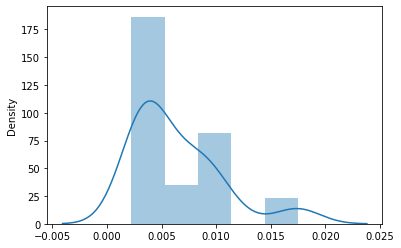

In [13]:
import seaborn as sns
sns.distplot(similar_clus_diff_dist, kde=True)

<AxesSubplot:ylabel='Count'>

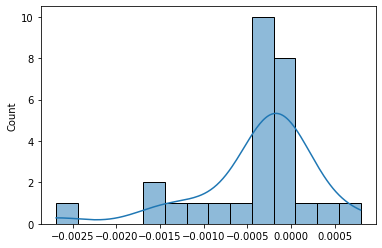

In [14]:
sns.histplot(similar_clus_ene_list, kde=True)

In [15]:
print(sorted(similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

[-0.002687740000002492, -0.0015495599999972853, -0.0014757400000000587, -0.0011966000000001031, -0.00097910000000212, -0.0007891600000000665, -0.0004985499999996534, -0.0003739600000010057, -0.00030251000000092176, -0.00028289000000114584, -0.0002689900000021339, -0.00026816999999823565, -0.0002475999999980161, -0.0002475999999980161, -0.00022062000000033777, -0.00022060999999951036, -0.00022059999999868296, -0.00018847000000121739, -0.00014786999999927275, -3.368999999864286e-05, -2.1509999999835827e-05, -1.4399999983538692e-06, 3.1800000002135675e-06, 2.4600000003260902e-05, 2.7200000001670332e-05, 0.00012324999999790975, 0.0004323600000013528, 0.0007958899999991331]


In [16]:
print(sorted(similar_clus_diff_dist))

[0.0022120393608778526, 0.002599631295525406, 0.0025996313195384333, 0.0031417465415132808, 0.003141956546584681, 0.003142063582825885, 0.0033238915900132486, 0.0035177244601957624, 0.0035516317547634826, 0.003649649423037523, 0.003897044748859664, 0.003934301938349511, 0.004128371683855226, 0.004463304034504313, 0.005009350738964666, 0.005233786791494847, 0.0062083764266331115, 0.00666973805747519, 0.007614654628766012, 0.008432758866409507, 0.008797832089589166, 0.00882523892512767, 0.008917516873246203, 0.009364145720114991, 0.009942815134691554, 0.011323805971768644, 0.017311875788739314, 0.017533691421211466]


In [17]:
similar_clus_diff_dist

[0.003897044748859664,
 0.009942815134691554,
 0.0025996313195384333,
 0.008797832089589166,
 0.009364145720114991,
 0.0035177244601957624,
 0.003649649423037523,
 0.008432758866409507,
 0.005233786791494847,
 0.0031417465415132808,
 0.00882523892512767,
 0.0035516317547634826,
 0.017533691421211466,
 0.002599631295525406,
 0.0062083764266331115,
 0.003934301938349511,
 0.004463304034504313,
 0.008917516873246203,
 0.011323805971768644,
 0.0022120393608778526,
 0.005009350738964666,
 0.00666973805747519,
 0.004128371683855226,
 0.017311875788739314,
 0.007614654628766012,
 0.003141956546584681,
 0.0033238915900132486,
 0.003142063582825885]

In [18]:
import pickle
with open ('Al7_similar_clus_diff_dist.pkl', 'wb') as fh:
    pickle.dump(similar_clus_diff_dist, fh)
with open ('Al7_similar_clus_ene_list.pkl', 'wb') as fh:
    pickle.dump(similar_clus_ene_list, fh)

In [19]:
with open('Al7_similar_clus_diff_dist.pkl', 'rb') as fh:
    dist_list_pkl = pickle.load(fh)

In [20]:
dist_list_pkl

[0.003897044748859664,
 0.009942815134691554,
 0.0025996313195384333,
 0.008797832089589166,
 0.009364145720114991,
 0.0035177244601957624,
 0.003649649423037523,
 0.008432758866409507,
 0.005233786791494847,
 0.0031417465415132808,
 0.00882523892512767,
 0.0035516317547634826,
 0.017533691421211466,
 0.002599631295525406,
 0.0062083764266331115,
 0.003934301938349511,
 0.004463304034504313,
 0.008917516873246203,
 0.011323805971768644,
 0.0022120393608778526,
 0.005009350738964666,
 0.00666973805747519,
 0.004128371683855226,
 0.017311875788739314,
 0.007614654628766012,
 0.003141956546584681,
 0.0033238915900132486,
 0.003142063582825885]

In [21]:
with open('Al7_similar_clus_ene_list.pkl', 'rb') as fh:
    ene_list_pkl = pickle.load(fh)
sorted(ene_list_pkl)

[-0.002687740000002492,
 -0.0015495599999972853,
 -0.0014757400000000587,
 -0.0011966000000001031,
 -0.00097910000000212,
 -0.0007891600000000665,
 -0.0004985499999996534,
 -0.0003739600000010057,
 -0.00030251000000092176,
 -0.00028289000000114584,
 -0.0002689900000021339,
 -0.00026816999999823565,
 -0.0002475999999980161,
 -0.0002475999999980161,
 -0.00022062000000033777,
 -0.00022060999999951036,
 -0.00022059999999868296,
 -0.00018847000000121739,
 -0.00014786999999927275,
 -3.368999999864286e-05,
 -2.1509999999835827e-05,
 -1.4399999983538692e-06,
 3.1800000002135675e-06,
 2.4600000003260902e-05,
 2.7200000001670332e-05,
 0.00012324999999790975,
 0.0004323600000013528,
 0.0007958899999991331]